<a href="https://colab.research.google.com/github/Mary2agonz/colab-cd24/blob/main/Sprint_M8_MAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOMBRE: Marilyn Aguilar González
------
Link Github: https://github.com/Mary2agonz/colab-cd24/blob/main/Sprint_M8_MAG.ipynb



Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.

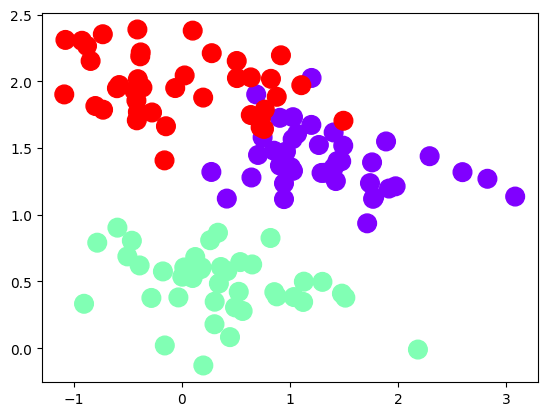

In [2]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()

Ahora los datos están listos para su procesamiento posterior.

Primero preparamos el conjunto de datos.

In [3]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [4]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n


# Obtenga la función LDA de Fisher

Implementación de la función análisis de discriminante


Obtenga resultado, agregue un gráfico y comente


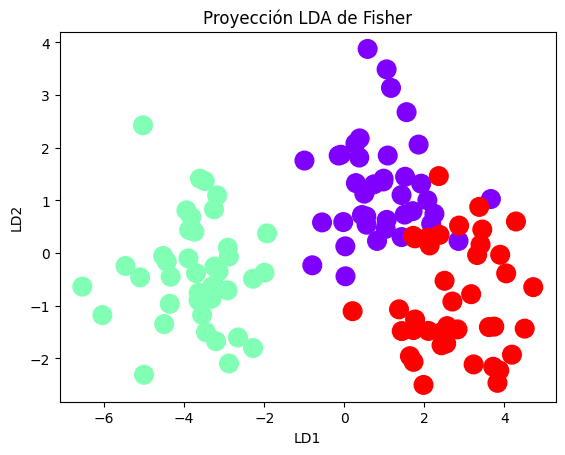

In [19]:
#Importo la implementación del LDA de la libreria scikit-learn para simplificar el código
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Creo la instancia de la clase "LinearDiscriminantAnalysis" y
#Defino la dimensionalidad de los datos a 2 dimensiones
lda = LinearDiscriminantAnalysis(n_components=2)
#Defino que el modelo lda se ajuste(entrene) a los datos de X
#Aplico transform() para que los datos originales de X se adecuen a la forma de LDA
#Aplico el método ravel() sobre la variable color que fue predefinida en este colab para convertir la matriz de etiquetas a una sola dimensión
X_lda = lda.fit_transform(X, color.ravel())

#Graficolos datos proyectados
plt.figure()
#Para el gráfico del LDA tome como ejemplo el tipo de gráfic (dispersión/scatter) que se utiliza con anterioridad en este colab:
#plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.scatter(X_lda[:, 0], X_lda[:, 1], s=180, c=color, cmap=plt.cm.rainbow)
#Añado el titulo y los nombres de los ejes
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("Proyección LDA de Fisher")
#Imprimo el gráfico
plt.show()

In [13]:
#Voy a evaluar la mtriz de confusión por lo tanto agrego las siguientes librerías
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Divido los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, color.ravel(), test_size=0.3, random_state=42)

#Entreno la instancia LDA creada anteriormente en el conjunto de entrenamiento
lda.fit(X_train, y_train)

#Realizo las predicciones en el conjunto de testeo
y_pred = lda.predict(X_test)

#Calculo la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

#Imprimo el resultado de la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[10  0  2]
 [ 0 14  0]
 [ 1  0  9]]


La matriz de confusión resultante expone que:

**Primera columna**: hay un total de 10 muestras de la clase 0 que fueron clasificadas como clase 0 (verdaderos positivos), no hay clasificaciones incorrectas (falsos negativos), y hay 1 muestra de la clase 0 que fue clasificada erroneamente como clase 2 (falso negativo).

**Segunda columna**: No hay muestras de la clse 1 clasificadas erroneamente como clase 0 y clase 3 (falsos negativos), y por el contrario, hay 14 muestras de la clase 1 que fueron correctamente clasificadas como clase 1 (verdaderos positivos).

**Tercera columna**: hay 2 muetras que fueron erroneamente clasificadas como calse 0 (falsos positivos), no hay muestras de la clase 2 erroneamente clasificadas (falsos negativos), y hay 9 muestras que fueron correctamente clasificadas como clase 2(verdaderos positivos).

En general es posible decir que la clasificación fue mayoritariamente correcta. Esto sugiere que la proyección LDA efectuada tuvo un buen rendimiento sobre el conjunto de datos analizado.

## K-Means

1.	Reanalice su datos y obtenga 2 y 3 cluster.

In [14]:
#Importo la libreria necesaria
from sklearn.cluster import KMeans

#Creo las instancias de Kmeans y la ajusto a random_state=20 para controlaer la aletoriedad en la ejecución del código
#Aplico para 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X)
#Aplico para 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)

#Utilizo "labels_" para obtener las etiquetas de los clusters en vez de predict() porque
#En este caso no estamos utilizando K-means para predecir, ya que con la utilización anterior del método fit() ya no necesitamos volver a realizar predicciones
labels_2 = kmeans_2.labels_
labels_3 = kmeans_3.labels_

In [21]:
#Agrego esta porcion de código para analizar los resultados
#Para ello analizaré el número de puntos por cluster y la inercia de los cluster

#N° de puntos por cluster
#para kmeans2
print("Número de puntos para 2 cluster:")
for i, cluster_count in enumerate(np.bincount(kmeans_2.labels_)):
    print(f"Cluster {i}: {cluster_count} puntos")
#para kmeans3
print("\nNúmero de puntos para 3 cluster:")
for i, cluster_count in enumerate(np.bincount(kmeans_3.labels_)):
    print(f"Cluster {i}: {cluster_count} puntos")

#Inercia del cluster
#para kmeans2
print("\nInercia del clustering (2 cluster):", kmeans_2.inertia_)
#para kmeans3
print("\nInercia del clustering (3 cluster):", kmeans_3.inertia_)

Número de puntos para 2 cluster:
Cluster 0: 62 puntos
Cluster 1: 58 puntos

Número de puntos para 3 cluster:
Cluster 0: 29 puntos
Cluster 1: 38 puntos
Cluster 2: 53 puntos

Inercia del clustering (2 cluster): 82.14294699586642

Inercia del clustering (3 cluster): 45.200164526724066


2.	Concluya lo obtenido y grafique lo pedido en 1.

En base a los resultados obtenidos, es posible comentar los siguiente:

* En cuanto al número de puntos por cluster, cuando se consideran 2 cluster se obtienen 62 puntos para el primer cluster y 58 para el segundo. Por lo tanto, se observa una distribución bastnte equitativa entre los dos cluster. Mientras que cuando se evaluan los puntos para 3 cluster, es posible notar que la distribución es más heterogenea, ya que el primer cluster contiene 29 puntos, el segundo 38 y el tercero la mayor cantidad de puntos (53).

* Por otro lado, en cuanto a la inercia evaluada, cuando se evaluan 3 cluster en comparación con dos es posible nortar que los cluster están más compactados pues la inercia total es menor (45,2 para 3 cluster vs 82,14 para 2).

Estos resultados sugieren que hay mayor variabilidad en los puntos cuando se evaluan 3 cluster en vez de dos, y que estos permanencen mas compactos, es decir que el agrupamiento entre los puntos no se encuentra tan disperso como cuando se evaluan 2 cluster. En este caso al utilizar 3 claster se obtienen cluster más homogéneos y cohesionados.

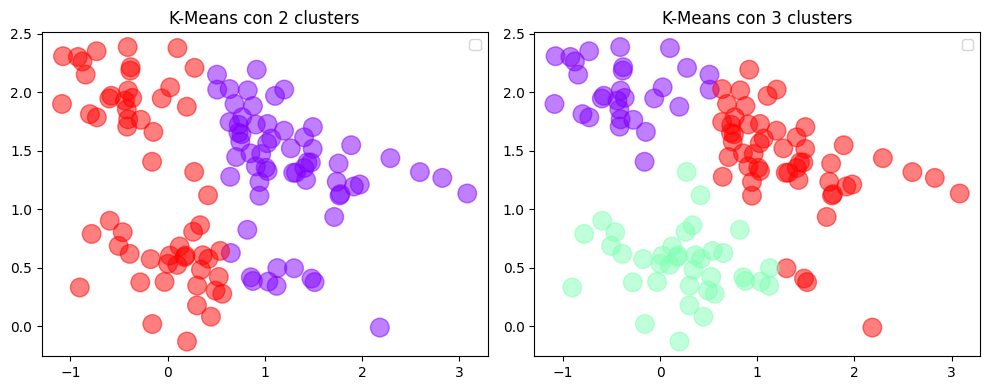

In [25]:
#PTome como ejemplo el tipo de gráfic (dispersión/scatter) que se utilizo con anterioridad en este colab:
#plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
#plt.scatter(X_lda[:, 0], X_lda[:, 1], s=180, c=color, cmap=plt.cm.rainbow)
#La unica diferencia mayor es que le agregué transparencia por la sobreposición de los puntos

#Defino la ventana gráfica
plt.figure(figsize=(10, 4))

#Gráfico para 2 clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=180, c=labels_2, cmap=plt.cm.rainbow, alpha=0.5)
plt.title("K-Means con 2 clusters")
plt.legend()

#Glafico para 3 clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], s=180, c=labels_3, cmap=plt.cm.rainbow, alpha=0.5)
plt.title("K-Means con 3 clusters")
plt.legend()

#Ajusto el diseño e imprimo el resultado
plt.tight_layout()
plt.show()
